# PageRank: Uma visão de Álgebra Linear

### Introdução

(Muitos dos quais lerão esse texto, quase nunca em sua vida, se depararam com o problema de ter que utilizar outro site de busca, além do Google, para encontrar algo que procura na internet. Porém, quando ela ainda estava em sua fase "jovem", isso era um problema comum.)
    
Praticamente todo mundo que você conhece usa o Google. Uns ou outros utilizam o Bing e algumas pessoas perdidas no tempo usam o Yahoo!. É verdade. Admita. Mas, algo razoável a se perguntar é: sempre foi assim? Provavelmente a resposta à essa pergunta é o que a maioria das pessoas responderiam: Nem sempre. [posso reler a introdução do livro para ter ideias boas do que adicionar aqui.]
    
Mas então, **por que** o Google é _o Google_? A resposta disso em uma palavra é: PageRank.
    
    
    
    
    
### PageRank
    
PageRank é um algoritmo criado por Sergey Brin e Larry Page, os fundadores da Google, no final de década de 90, o qual utiliza a estrutura de _links_ da internet para dar uma classificação à páginas dela.

A ideia central do algoritmo é resumida na seguinte frase: Uma página é importante se páginas importantes levam à ela. Em minha opinião, isso parece um pouco "paradoxal [recursivo?]". Por que páginas importantes que levam à uma página são importantes? Porque páginas importantes levam à essas páginas importantes. Agora, por que essas páginas importantes que levam à páginas importantes os quais levam à uma página são importantes? (e por aí vai...). Esse "paradoxo [recursão]", na verdade, é algo imbutido no algoritmo, algo que é trabalhado para se calcular as classificações de cada página. Conforme o texto, mais especificamente na seção de matemática, for progredindo, essa ideia ficará mais clara.
    
    
Um fato curioso sobre o PageRank é que ele utiliza conceitos básicos da Álgebra Linear. Qualquer um que já fez algum curso de Álgebra Linear possui as ferramentas básicas para entender _como_ e o _por que_ o PageRank funciona. Isso é justo o foco central deste texto.
    
    
    
### A Matemática por trás

Para começarmos, suponha um conjunto $P$ com $n=7$ páginas da internet dadas por $P_i \ (i = 1,2,...,7)$. Suponha também que as páginas desse conjunto possuem _links_ que vão para páginas do conjunto. Uma forma interessante de visualizar as páginas de $P$ e os _links_ entre elas é por meio de um grafo, encontrado na imagem abaixo.
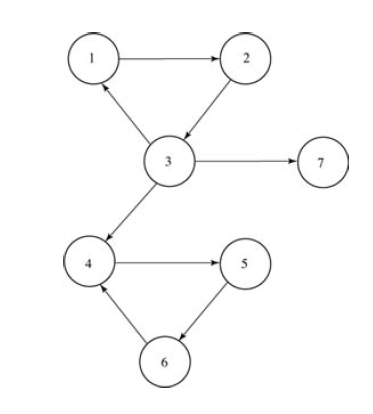
Na imagem, os nós (círculos) representam as páginas e as arestas (setas) representam os _links_ entre as páginas.
